# Exercise Set 9


## Mohaddeseh Mozaffari

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import odeint
from numba import njit
sns.set()

# Q1:

In [10]:
Mu = np.linspace(0, 4, 100)
M = 500
N = 1000

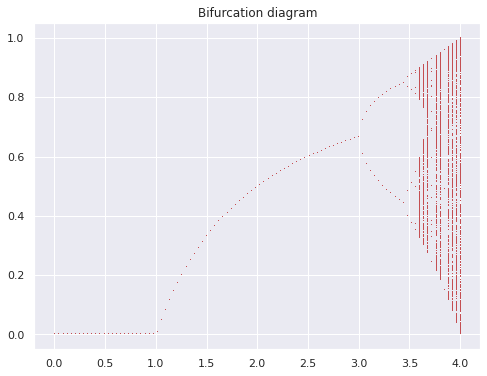

In [14]:
fig, ax = plt.subplots(figsize=(8,6))
for mu in Mu:
    for m in range(M):
        x = np.random.random()
        for n in range(N):
            x = x*mu*(1-x)
        ax.plot(mu, x, ',r', alpha=1)
ax.set_title("Bifurcation diagram")
plt.show()

# Q2:

In [93]:
w0 = 1
a = 0.2
f = 0.52
w = 0.666
dt = 0.01
T = np.arange(0, 1000, dt)
x0 = [0,0]

In [94]:
def theta2(x,t, w0, a, f, w):
    return (x[1], -(w0**2)*np.sin(x[0])- a*x[1]+f*np.cos(w*t))

In [83]:
sol = odeint(theta2, x0, T, args=(w0, a, f, w))

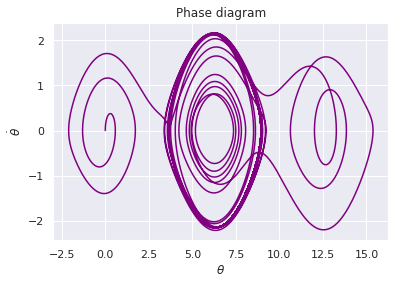

In [84]:
plt.plot(sol[:, 0], sol[:, 1], color="purple")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$\dot{\theta}$")
plt.title("Phase diagram")
plt.show()

In [97]:
F = np.linspace(0, 2, 100)

In [107]:
theta_dot = []
for ff in F:
    sol = odeint(theta2, x0, T, args=(w0, a, ff, w))
    theta_dot.append(abs(sol[1000, 1]))

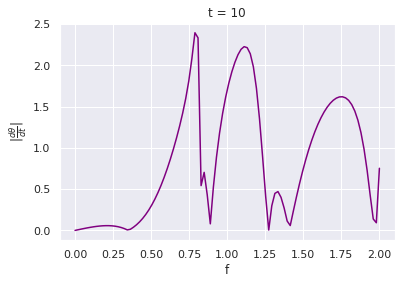

In [109]:
plt.plot(F, theta_dot, color="purple")
plt.xlabel("f")
plt.ylabel(r"$|\frac{d\theta}{dt}|$")
plt.title("t = 10")
plt.show()

# Q3:

In [138]:
def f(x, t):
    dxdt = 10*(x[1] - x[0])
    dydt = -x[0]*x[2] + 28*x[0] - x[1]
    dzdt = x[0]*x[1] - (8/3)*x[2]
    return np.array([dxdt, dydt, dzdt])

In [21]:
t = np.linspace(0, 100, 1000)
x0 = np.array([1, 1, 1])

In [24]:
sol = odeint(f, x0, t)
X = sol[:, 0]
Y = sol[:, 1]
Z = sol[:, 2]

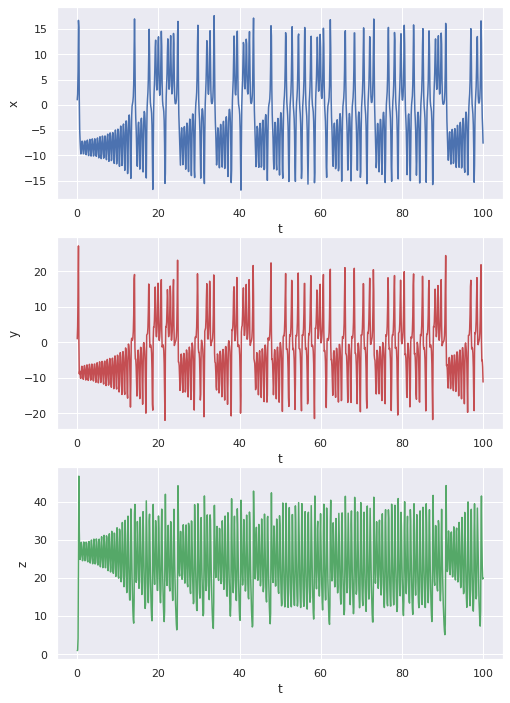

In [25]:
fig, ax = plt.subplots(3, 1, figsize=(8, 12))
ax[0].plot(t, X, 'b')
ax[0].set_xlabel('t')
ax[0].set_ylabel('x')
ax[1].plot(t, Y, 'r')
ax[1].set_xlabel('t')
ax[1].set_ylabel('y')
ax[2].plot(t, Z, 'g')
ax[2].set_xlabel('t')
ax[2].set_ylabel('z')
plt.show()

In [31]:
dxdt = 10*(Y - X)
dydt = -X*Z + 28*X - Y
dzdt = X*Y - (8/3)*Z

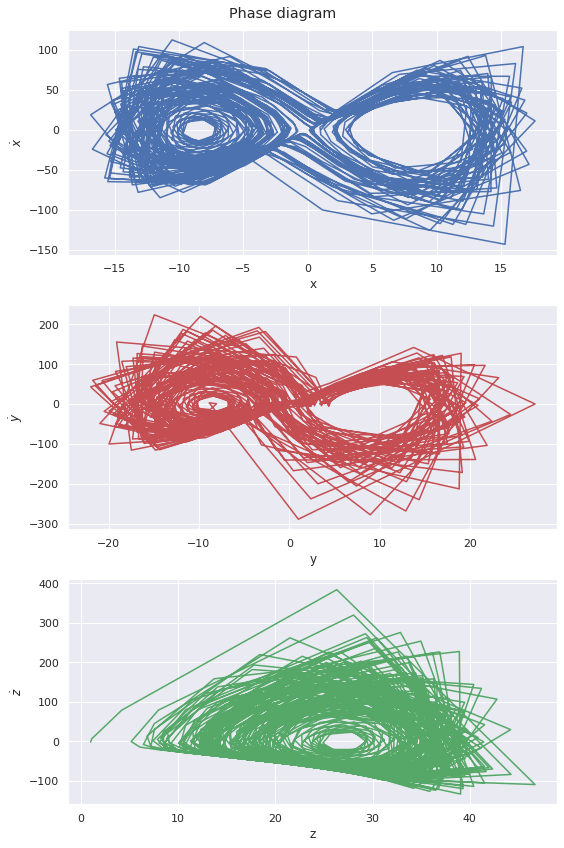

In [36]:
fig, ax = plt.subplots(3, 1, figsize=(8, 12))
ax[0].plot(X, dxdt, 'b')
ax[0].set_xlabel('x')
ax[0].set_ylabel(r'$\dot{x}$')

ax[1].plot(Y, dydt , 'r')
ax[1].set_xlabel('y')
ax[1].set_ylabel(r'$\dot{y}$')

ax[2].plot(Z, dzdt, 'g')
ax[2].set_xlabel('z')
ax[2].set_ylabel(r'$\dot{z}$')

plt.suptitle("Phase diagram")
plt.tight_layout()
plt.show()

# Q4:

## A)

In [3]:
Mu = np.linspace(0,4, 1000)
N = 100000

In [ ]:
L = []
for mu in Mu:
    l = 0
    for _ in range(N):
        x = np.random.random()
        l += np.log(abs(mu- 2*mu * x))
    l /= N
    L.append(l)

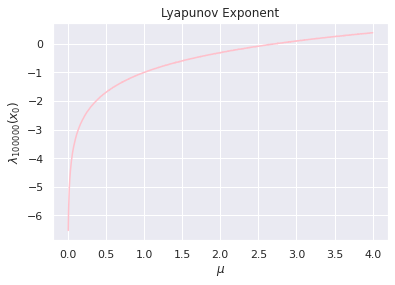

In [9]:
plt.plot(Mu, L, color="pink")
plt.title('Lyapunov Exponent')
plt.xlabel(r'$\mu$')
plt.ylabel(rf"$\lambda_{ {N} }(x_0)$")
plt.show()

## B)

### Q2:

In [211]:
w0 = 1
a = 0.2
f = 0.52
w = 0.666
dt = 0.01
T = np.arange(0, 1000, dt)
x0 = [0.1 ,0.1]
num_initial = 100
epsilon = 1e-6

In [212]:
def theta2(x,t, w0, a, f, w):
    return (x[1], -(w0**2)*np.sin(x[0])- a*x[1]+f*np.cos(w*t))

In [213]:
sol = odeint(theta2, x0, T, args=(w0, a, f, w))

In [ ]:
l = 0
for n in range(num_initial):
    x_int = [epsilon*np.random.randn(), 0]
    sol_int = odeint(theta2, x_int, T, args=(w0, a, f, w))
    delta_n = abs(sol_int[:, 0] - sol[:, 0])
    l = np.mean(np.log(delta_n/x_int[0]))
l /= num_initial

In [215]:
print("Lyapunov exponent for Q2 is: ", round(l,3))

Lyapunov exponent for Q2 is:  0.171


### Q3:

In [191]:
def f(x, t):
    dxdt = 10*(x[1] - x[0])
    dydt = -x[0]*x[2] + 28*x[0] - x[1]
    dzdt = x[0]*x[1] - (8/3)*x[2]
    return np.array([dxdt, dydt, dzdt])

In [192]:
t = np.linspace(0, 100, 1000)
x0 = np.array([0.1, 0.1, 0.1])

In [193]:
sol = odeint(f, x0, t)
X = sol[:, 0]

In [194]:
num_initial = 1000
epsilon = 1e-6

In [195]:
lx , ly, lz = 0, 0, 0
for n in range(num_initial):
    x_int = x0 + epsilon*np.random.randn(3)
    sol_int = odeint(f, x_int, t)
    delta_n_x = abs(sol_int[:, 0] - sol[:, 0])
    delta_n_y = abs(sol_int[:, 1] - sol[:, 1])
    delta_n_z = abs(sol_int[:, 2] - sol[:, 2])
    lx = np.mean(np.log(delta_n_x/x_int[0]))
    ly = np.mean(np.log(delta_n_y/x_int[1]))
    lz = np.mean(np.log(delta_n_z/x_int[2]))
lx /= num_initial
ly /= num_initial
lz /= num_initial

In [200]:
print("Lyapunov exponent for Q3 x component is: ",round(lx, 5))
print("Lyapunov exponent for Q3 y component is: ",round(ly, 5))
print("Lyapunov exponent for Q3 z component is: ",round(lz, 5))

Lyapunov exponent for Q3 x component is:  0.0011
Lyapunov exponent for Q3 y component is:  0.00126
Lyapunov exponent for Q3 z component is:  0.00126


# Q5:

In [167]:
@njit
def lyapunov_exp(data):
    L = []
    N = len(data)
    def d_n(data, n, tau):
        return abs(data[n+tau] - data[n])
    for tau in range(N):
        l = 0
        d0 = d_n(data, 0, tau)
        if d0 != 0:
            for n in range(1, N-tau):
                dn = d_n(data, n, tau)
                l += np.log(dn/d0)/n
            l /= N
            L.append(l)
    return L

In [168]:
data1 = np.loadtxt("/home/mohaddeseh/Documents/Programing/Computational/HW9/chaotic_data/0.200.txt")
data1 = data1[:,1]
l1 = lyapunov_exp(data1)

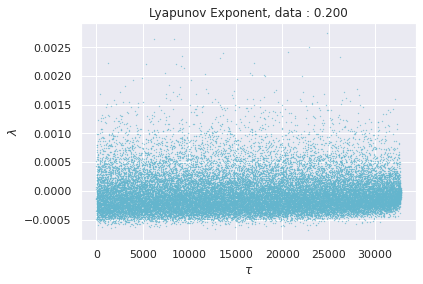

In [169]:
plt.scatter(range(len(l1)), l1, s=0.1, color="c")
plt.title('Lyapunov Exponent, data : 0.200')
plt.ylabel('$\lambda$')
plt.xlabel(r'$\tau$')
plt.show()

In [170]:
data2 = np.loadtxt("/home/mohaddeseh/Documents/Programing/Computational/HW9/chaotic_data/0.900.txt")
data2 = data2[:, 1]
l2 = lyapunov_exp(data2)

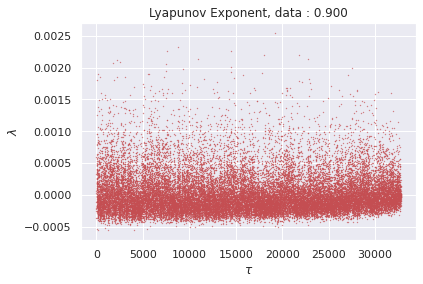

In [171]:
plt.scatter(range(len(l2)), l2, s=0.1, color="r")
plt.title('Lyapunov Exponent, data : 0.900')
plt.ylabel('$\lambda$')
plt.xlabel(r'$\tau$')
plt.show()

In [172]:
data3 = np.loadtxt("/home/mohaddeseh/Documents/Programing/Computational/HW9/chaotic_data/logistic_map4.txt")
data3 = data3[:, 1]
l3 = lyapunov_exp(data3)

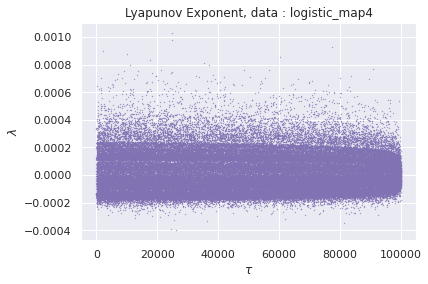

In [173]:
plt.scatter(range(len(l3)), l3, s=0.1, color="m")
plt.title('Lyapunov Exponent, data : logistic_map4')
plt.ylabel('$\lambda$')
plt.xlabel(r'$\tau$')
plt.show()

In [174]:
data4 = np.loadtxt("/home/mohaddeseh/Documents/Programing/Computational/HW9/chaotic_data/position.txt")
data4_0 = data4[:, 0]
data4_1 = data4[:, 1]
l4_0 = lyapunov_exp(data4_0)
l4_1 = lyapunov_exp(data4_1)

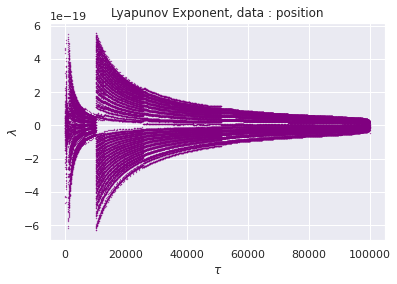

In [175]:
plt.scatter(range(len(l4_0)), l4_0, s=0.1, color="purple")
plt.title('Lyapunov Exponent, data : position')
plt.ylabel('$\lambda$')
plt.xlabel(r'$\tau$')
plt.show()

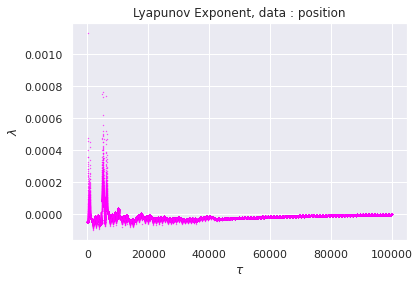

In [176]:
plt.scatter(range(len(l4_1)), l4_1, s=0.1, color="magenta")
plt.title('Lyapunov Exponent, data : position')
plt.ylabel('$\lambda$')
plt.xlabel(r'$\tau$')
plt.show()

In [177]:
data5 = np.loadtxt("/home/mohaddeseh/Documents/Programing/Computational/HW9/chaotic_data/position2.txt")
data5_0 = data5[:, 0]
data5_1 = data5[:, 1]
l5_0 = lyapunov_exp(data5_0)
l5_1 = lyapunov_exp(data5_1)

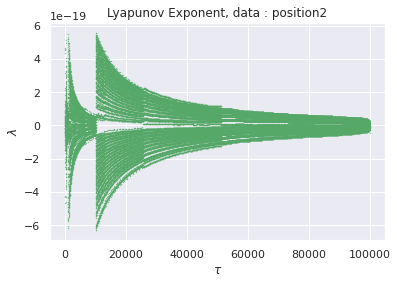

In [178]:
plt.scatter(range(len(l5_0)), l5_0, s=0.1, color="g")
plt.title('Lyapunov Exponent, data : position2')
plt.ylabel('$\lambda$')
plt.xlabel(r'$\tau$')
plt.show()

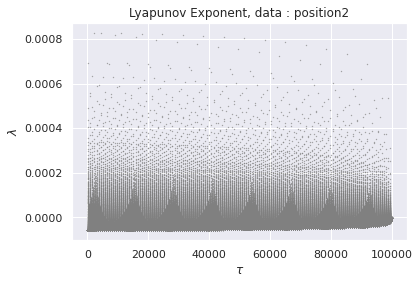

In [190]:
plt.scatter(range(len(l5_1)), l5_1, s=0.1, color="grey")
plt.title('Lyapunov Exponent, data : position2')
plt.ylabel('$\lambda$')
plt.xlabel(r'$\tau$')
plt.show()

In [180]:
data6 = np.loadtxt("/home/mohaddeseh/Documents/Programing/Computational/HW9/chaotic_data/velocity.txt")
data6_0 = data6[:, 0]
data6_1 = data6[:, 1]
l6_0 = lyapunov_exp(data6_0)
l6_1 = lyapunov_exp(data6_1)

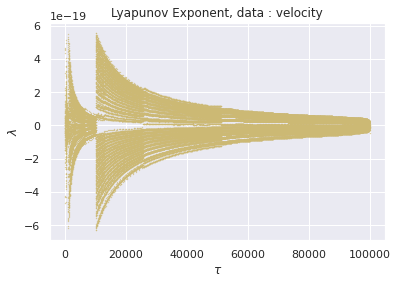

In [181]:
plt.scatter(range(len(l6_0)), l6_0, s=0.1, color="y")
plt.title('Lyapunov Exponent, data : velocity')
plt.ylabel('$\lambda$')
plt.xlabel(r'$\tau$')
plt.show()

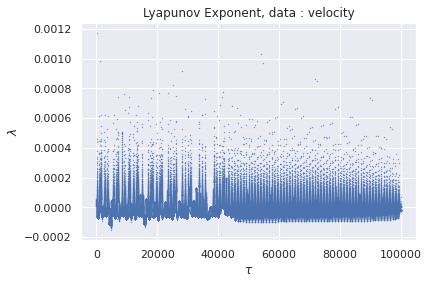

In [189]:
plt.scatter(range(len(l6_1)), l6_1, s=0.1, color="b")
plt.title('Lyapunov Exponent, data : velocity')
plt.ylabel('$\lambda$')
plt.xlabel(r'$\tau$')
plt.show()